In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()


'/content'

In [6]:
#this is the dataset location which is shown in video
'''
os.chdir('/content/drive/My Drive/data/Day03/')
'''
#now you have to use below one as you already created Data folder shortcut in My Drive
os.chdir('/content/drive/My Drive/data/Day03/')

In [7]:
!ls

Churn_Modelling.csv	     iris_test.csv
DL_ANN_Churn_Modeling.ipynb  iris_training.csv


In [8]:
os.chdir('/content/drive/My Drive/data/Day03/')

In [9]:
import pandas as pd
dataset = pd.read_csv("Churn_Modelling.csv")

In [10]:
dataset.shape

(10000, 14)

In [11]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
features = dataset.iloc[:, 3:13].values
labels = dataset.iloc[:, 13].values

In [14]:
features

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [15]:
labels

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')

features = np.array(columnTransformer.fit_transform(features), dtype = np.float32)


features = features[:, 1:] #drop the first dummy column for Geography

features = features[:, [0,1,3,4,5,6,7,8,9,10,11]] #drop the column for Gender


In [17]:
features.shape

(10000, 11)

In [18]:
features[0,:]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0134888e+05], dtype=float32)

In [19]:
features.shape

(10000, 11)

In [20]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [21]:
features[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0134888e+05], dtype=float32)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

In [23]:
features_train[0]

array([-0.56984437,  1.7430905 , -1.0916871 ,  0.16958177, -0.46460798,
        0.00666099, -1.2157176 ,  0.8095029 ,  0.64259493, -1.0322704 ,
        1.1064317 ], dtype=float32)

In [24]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
classifier = Sequential()

In [26]:
features.shape

(10000, 11)

In [27]:
#adding the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

In [28]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
classifier.fit(features_train, labels_train, batch_size = 10, epochs = 10)

Epoch 1/10
800/800 [==============================] - 5s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 8/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 9/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960
Epoch 10/10
800/800 [==============================] - 2s 2ms/step - loss: 3.1467 - accuracy: 0.7960

In [31]:

model = Sequential()
labels_pred =np.argmax(model.predict(features_test), axis=-1)

#labels_pred = classifier.predict_classes(features_test)
#labels_pred = (labels_pred > 0.5)

In [32]:
#labels_pred = classifier.predict_classes(features_test)

model = Sequential()
labels_pred =np.argmax(model.predict(features_test), axis=-1)
#labels_pred =model.predict(features_test) 
#labels_pred = (labels_pred > 0.5)

In [33]:
labels_pred

array([0, 8, 1, ..., 1, 0, 0])

In [34]:
len(labels_pred)

2000

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, labels_pred)

In [36]:
cm


array([[335, 380,  75, 127, 116, 144,  91,  42,   6, 150, 129],
       [125,  49,  10,  24,  66,  21,  20,  58,   4,   9,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

# Lets summarize the above model.

In [37]:
print classifier.summary()

SyntaxError: ignored

In [38]:
classifier.count_params()

121

In [39]:
!pip install pydot

In [40]:
!pip install pydot_ng

In [41]:
!pip install graphviz

In [42]:
!pip install pydotplus

In [43]:
!pip install pydot==1.2.3

  Created wheel for pydot: filename=pydot-1.2.3-py3-none-any.whl size=18940 sha256=a703b2dffa8be030eadd3ecaad3da014bc64c65b88dce290344f8d32c126d6e3
  Stored in directory: /root/.cache/pip/wheels/94/a8/4b/d76c975fd000ecff606a1b170d541bbef0f6429fe1084dcb49
Successfully built pydot
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [44]:
import pydot
from keras.utils.vis_utils import plot_model

In [45]:
pydot.__version__

'1.2.3'

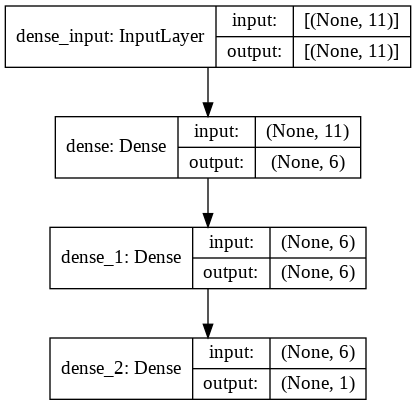

In [46]:
#check out the issue, the code is not working
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


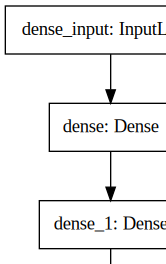

In [47]:
#check out the issue, the code is not working
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

In [48]:
classifier.layers

In [51]:
for layer in classifier.layers:
    print (layer.input_shape) #how the input data is coming to hidden/dense layers


(None, 11)
(None, 6)
(None, 6)


You can get to know that: there is no activation function present "in" the first layer neurons at all. the very first layer is your raw data so no activation function. 

The next layer (i.e. the 1st hidden layer) applies the activation function as well as all subsequent layers. 

In [52]:
for layer in classifier.layers:
    print (layer.output_shape)



(None, 6)
(None, 6)
(None, 1)


# Classification using Iris Dataset

In [53]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy
import pandas as pd

In [56]:
#this is the dataset location which is shown in video
'''
training_dataset = pd.read_csv('/content/drive/My Drive/data/Day03/iris_training.csv')
'''
#now you have to use below one as you already created Data folder shortcut in My Drive
training_dataset = pd.read_csv('/content/drive/My Drive/data/Day03/iris_training.csv')

features_train = training_dataset.iloc[:, 0:4].values
labels_train = training_dataset.iloc[:, 4].values

In [57]:
training_dataset.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [58]:
# Import testing dataset
'''
test_dataset = pd.read_csv('/content/drive/My Drive/data/Day03/iris_test.csv')
'''
test_dataset = pd.read_csv('/content/drive/My Drive/data/Day03/iris_test.csv')

features_test = test_dataset.iloc[:, 0:4].values
labels_test = test_dataset.iloc[:, 4].values

In [59]:
test_dataset.sample()

,30,4,setosa,versicolor,virginica
8,5.6,3.0,4.1,1.3,1


In [60]:
# Encoding training dataset
encoding_labels_train = np_utils.to_categorical(labels_train)

# Encoding training dataset
encoding_labels_test = np_utils.to_categorical(labels_test)

In [61]:
encoding_labels_train[0]

array([0., 0., 1.], dtype=float32)

In [62]:
# Creating a model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Training a model
model.fit(features_train, encoding_labels_train, epochs=300, batch_size=10)

Epoch 1/300
12/12 [==============================] - 1s 3ms/step - loss: 1.5094 - accuracy: 0.3500
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 1.2789 - accuracy: 0.3500
Epoch 3/300
12/12 [==============================] - 0s 3ms/step - loss: 1.1121 - accuracy: 0.3500
Epoch 4/300
12/12 [==============================] - 0s 3ms/step - loss: 1.0147 - accuracy: 0.3500
Epoch 5/300
12/12 [==============================] - 0s 3ms/step - loss: 0.9519 - accuracy: 0.3500
Epoch 6/300
12/12 [==============================] - 0s 3ms/step - loss: 0.9003 - accuracy: 0.3500
Epoch 7/300
12/12 [==============================] - 0s 3ms/step - loss: 0.8660 - accuracy: 0.4667
Epoch 8/300
12/12 [==============================] - 0s 3ms/step - loss: 0.8347 - accuracy: 0.7000
Epoch 9/300
12/12 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.7000
Epoch 10/300
12/12 [==============================] - 0s 4ms/step - loss: 0.7747 - accuracy: 0.7000
Epoch 11/

In [64]:
# Evaluate the model
scores = model.evaluate(features_test, encoding_labels_test)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 163ms/step - loss: 0.0601 - accuracy: 0.9667

Accuracy: 96.67%


In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.count_params()

193